In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

# import os

# # !pip install fire
# # !pip install tqdm

# home_dir = '/content/gdrive/My Drive/A0/aispace'
# os.chdir(home_dir)
# !pwd

# import os
# # Get the current working directory
# current_directory = os.getcwd()
# print(current_directory)

# import shutil
# import os

In [3]:
# !pip install rasterio
# !pip install accelerate
# !pip install peft
# !pip install transformers
# # !pip install transformers==4.34.0
# !pip install datasets

In [4]:
import evaluate
print(evaluate.__version__)
# fn

0.4.1


In [5]:
KAGGLE = False
if KAGGLE == True:
    # Define the input and output directories
    input_directory  = '/kaggle/input/begreat'  # Replace with the path to your input directory
    output_directory = '/kaggle/working'  # Replace with the path to your output directory

    def input_copy(input_directory, output_directory):
        # Get a list of files in the input directory
        files_to_copy = os.listdir(input_directory)
        # Iterate through the files and copy them to the output directory
        for file_name in files_to_copy:
            # Create the full paths for the source and destination
            source_file = os.path.join(input_directory, file_name)
            destination_file = os.path.join(output_directory, file_name)

            # Copy the file from the source to the destination
            shutil.copy(source_file, destination_file)

        # Get a list of files in the input directory
        files = os.listdir(output_directory)
        print(files)

    input_copy(input_directory, output_directory)

    source_directory  = '/kaggle/input/'  # Replace with the path to your input directory
    destination_directory = '/kaggle/working/input'  # Replace with the path to your output directory

    # Copy the source directory to the destination directory
    shutil.copytree(source_directory, destination_directory)

    input_copy(input_directory, output_directory)

In [6]:
import numpy as np

import great
from great import GReaT

import pandas as pd

################################
import numpy as np

import pandas as pd

# all imports should go here

import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

import sklearn
from sklearn.model_selection import train_test_split

import skimage.exposure

# access package for AWS access
# import boto3

import sys
import os
import subprocess
import datetime
import platform
import datetime

from tqdm import tqdm

# import ee
import h5py
import numpy as np
from datetime import datetime, timedelta  # Import timedelta here
import random
import pandas as pd

import time
import rasterio as rio
################################

from hlsdataset import HLSDataSet

import shutil

# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

In [7]:
class HLSInference(HLSDataSet):
    def __init__(self, doy=211, table_dtype = 'float16', path='./aispace/data/L8-100x100'):
        super().__init__(table_dtype = table_dtype, path=path)
        # self.model = model
        self.doy_to_impute = doy

        self.imputed_data = None
        self.recovered_data = None

        self.imputed_file = ''

        # self.nan_data = self.to_impute #.copy()    # to_impute.copy()
        # display(self.nan_data)
        #### for only one day processing ###########################
        self.nan_data_doy = None # self.nan_data.loc[(self.nan_data['DOY'] == doy)]
        self.nan_data_doy = None #  self.nan_data_doy.reset_index(drop=True)

        self.data_doy = None #  self.clear_data.loc[(self.clear_data['DOY'] == doy)]
        self.data_doy = None #  self.data_doy.reset_index(drop=True)

        # self.nan_data_resid  = self.nan_data.loc[(nan_data['DOY'] != doy)]
        # self.nan_data_resid  = self.nan_data_resid.reset_index(drop=True)

    def _impute(self, model, columns_impute=['B02', 'B03', 'B04', 'PID', 'DOY'], device='cuda', k=400, max_length=1000, temperature=0.01):
    # def _impute(self, model, columns_impute=['B02', 'B03', 'B04', 'X', 'Y', 'DOY'], device='cuda', k=400, max_length=1000, temperature=0.01):

        self.nan_data_doy = self.to_impute.loc[(self.to_impute['DOY'] == self.doy_to_impute)]
        self.nan_data_doy = self.nan_data_doy.reset_index(drop=True)

        self.data_doy = self.clear_data.loc[(self.clear_data['DOY'] == self.doy_to_impute)]
        self.data_doy = self.data_doy.reset_index(drop=True)

        # print(f'to impute data:')
        # display(self.nan_data_doy)
        print(f'to impute data:')
        display(self.nan_data_doy)
        display(self.data_doy)

        # fn

        print(f'NumPy version:{np.__version__}')
        np.float = float

        # Get the DataFrame with columns in reverse order
        # self.nan_data_doy = self.nan_data_doy[self.nan_data_doy.columns[::-1]].copy()

        ######################### ORIGINAL ##############################################################
        _impute = self.nan_data_doy[columns_impute].copy()
        # _impute[['DOY', 'PID']] = _impute[['DOY', 'PID']].astype(int)
        print('IMPUTE:')
        display(_impute)
        # self.imputed_data = pd.read_csv('imputed.csv')
        self.imputed_data = model.impute(_impute, k=k, max_length=max_length, temperature=temperature, device=device)
        self.imputed_data.to_csv('imputed2.csv')

        print('IMPUTED:')
        display(self.imputed_data)
        #########################################################################################
        # ################################## FOR BANDS in ONE BAND#####################################################
        # # _impute = self.nan_data_doy[columns_impute].copy()
        # _impute = self.nan_data_doy[columns_impute].copy()
        # _impute[['PID', 'DOY', 'BAND']] = self.nan_data_doy[['PID', 'DOY', 'B03']].copy()
        # _impute = _impute[['PID', 'DOY', 'BAND']].copy()
        # print('IMPUTE:')
        # display(_impute)
        # # self.imputed_data = pd.read_csv('imputed.csv')
        # self.imputed_data = model.impute(_impute, k=k, max_length=max_length, temperature=temperature, device=device)
        # self.imputed_data.to_csv('imputed2.csv')

        # print('IMPUTED:')
        # display(self.imputed_data)

        # # # Inverse operation: Split 'BAND' column back into individual columns
        # aa = self.nan_data_doy[columns_impute].copy()
        # display(aa)
        
        # # aa[['B02', 'B03', 'B04', 'NN']]  
        # aa = self.imputed_data['BAND'].str.split(';', expand=True)
        # display(aa)
        
        # self.imputed_data[['B02', 'B03', 'B04', 'NN']] = self.imputed_data['BAND'].str.split(';', expand=True)

        # # # Convert columns back to their original data types
        # self.imputed_data[['B02', 'B03', 'B04']] = self.imputed_data[['B02', 'B03', 'B04']].astype(table_dtype)

        # print('IMPUTED:')
        # display(self.imputed_data)
        # #########################################################################################
        
        # imputed_file = f'A0[optim_sophia]/imputed_output_run[3].csv'
        # self.imputed_data = pd.read_csv(imputed_file)
        # self.imputed_data = self.nan_data_doy.copy()

        print(self.nan_data_doy.columns, self.imputed_data.columns)
        print(self.nan_data_doy.shape, self.imputed_data.shape)

        # Merge the dataframes by X and Y columns and replace B3 in df1 with B3 from df2
        merged_df = self.nan_data_doy.merge(self.imputed_data, on=['PID', 'DOY'], suffixes=('', '_df2'), how='left')  
        # Replace the original B3 column with B3 from df2
        merged_df['B02'] = merged_df['B02_df2']
        merged_df['B03'] = merged_df['B03_df2']
        merged_df['B04'] = merged_df['B04_df2']
        
        # Drop the additional B3_df2 column
        merged_df = merged_df.drop('B02_df2', axis=1)
        merged_df = merged_df.drop('B03_df2', axis=1)
        merged_df = merged_df.drop('B04_df2', axis=1)

        self.imputed_data = merged_df.copy()
        
        print(self.nan_data_doy.columns, self.imputed_data.columns)
        print(self.nan_data_doy.shape, self.imputed_data.shape)
        # fn
        # cols = self.nan_data_doy.columns 
        # self.imputed_data

        # Get the DataFrame with columns in reverse order
        self.imputed_data = self.imputed_data[self.imputed_data.columns[::-1]].copy()

        if len(self.imputed_data) != len(self.nan_data_doy):
            print('len(self.imputed_data) != len(self.nan_data_doy)')
            # Use the merge function with indicator=True
            original_df = self.nan_data_doy
            subset_df = self.imputed_data

            merged_df = pd.merge(original_df, subset_df, on=['PID', 'DOY'], how='left', indicator=True)

            # Find the rows in original_df that are not in subset_df
            missing_rows = original_df[merged_df['_merge'] == 'left_only']

            # Display the missing rows
            # display(missing_rows)

            self.imputed_data = pd.concat([self.imputed_data, missing_rows], axis=0)

        self.recovered_data = pd.concat([self.imputed_data, self.data_doy], axis=0)
        self.recovered_data = self.recovered_data.reset_index(drop=True)

        print('imputed_data')
        display(self.imputed_data)

        print('recovered_data')
        display(self.recovered_data)

        return self.recovered_data

    def _set_inference_recovered(self,):
       self.inference_data = self.recovered_data
       self.inference_data = self.inference_data.sort_values(by=['Y', 'X', 'DOY', ])

       return self.inference_data

    def _save_recovered(self, imputed_file=f'recovered_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.recovered_data.to_csv(self.imputed_file)

    def _read_recovered(self, imputed_file=f'recovered_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.recovered_data = pd.read_csv(self.imputed_file)
        # display(self.imputed_data)
        # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
        self.recovered_data = self.recovered_data.loc[:, ~self.recovered_data.columns.str.contains('^Unnamed')]
        return self.recovered_data

    def _save_imputed(self, imputed_file=f'imputed_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.imputed_data.to_csv(self.imputed_file)

    def _read_imputed(self, imputed_file=f'imputed_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.imputed_data = pd.read_csv(self.imputed_file)
        # display(self.imputed_data)
        # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
        self.imputed_data = self.recovered_data.loc[:, ~self.recovered_data.columns.str.contains('^Unnamed')]
        return self.imputed_data

/home
NumPy version:1.26.1
<class 'int'>
PIDs is  9999
[203]


/home/aispace/hlsdataset.py:235: RuntimeWarning: invalid value encountered in cast
  normalized_band = ((band - min_val) / (max_val - min_val) * 255).astype(np.uint8)


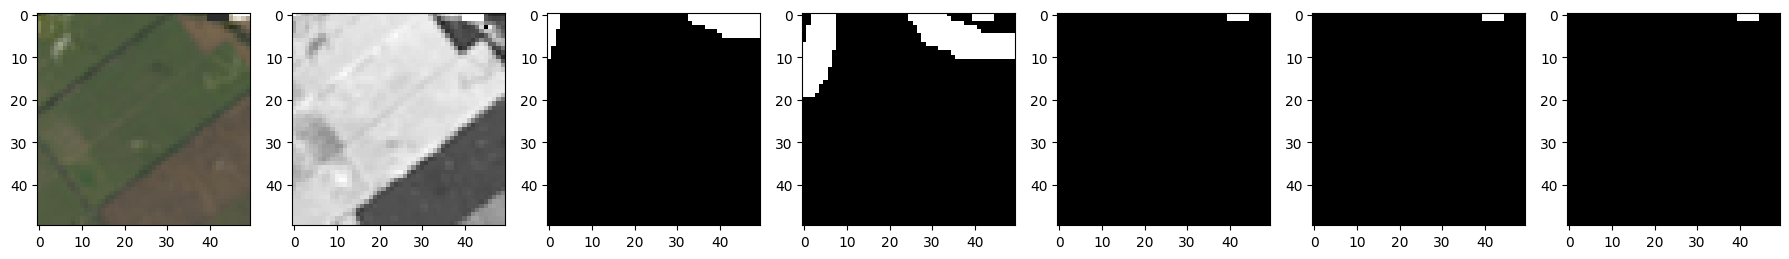

[211]


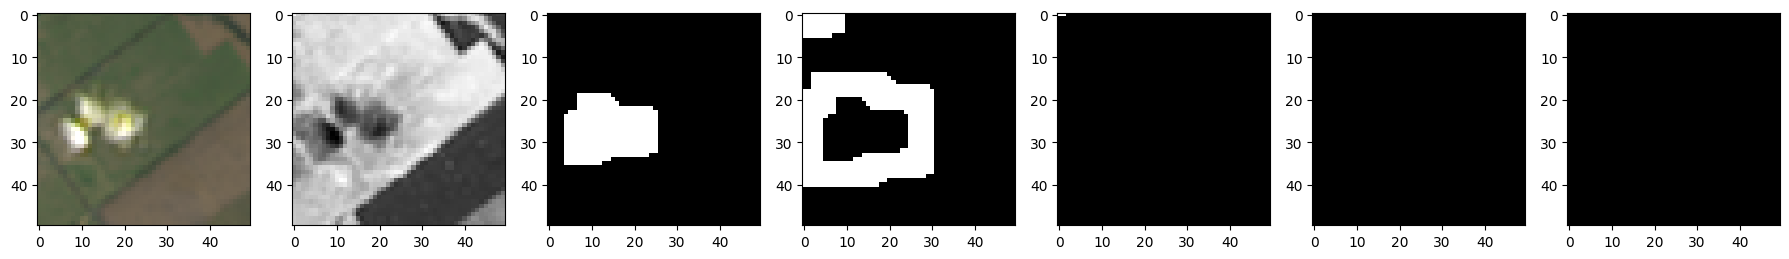

[219]


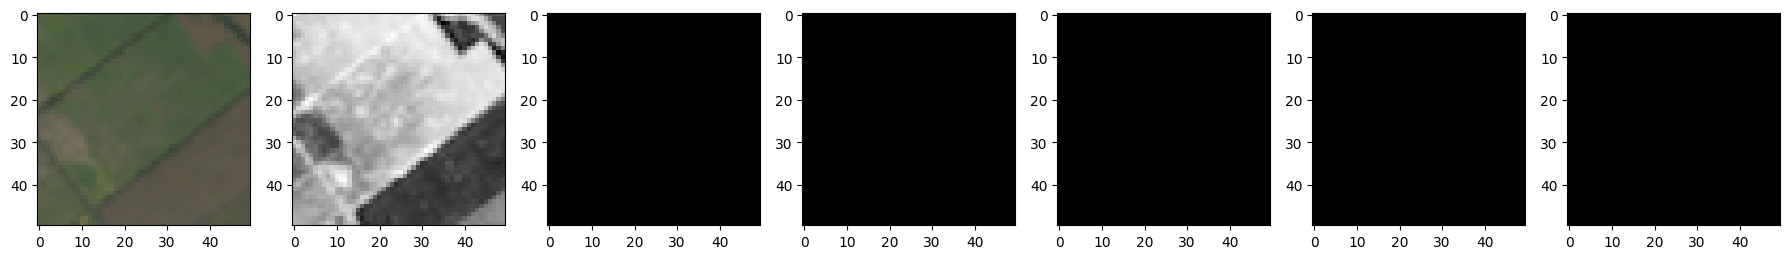

,Unnamed: 0,B01,B02,B03,B04,B05,B06,B07,B09,B10,...,aero,SAA,SZA,VAA,VZA,X,Y,DOY,NDVI,PID
0,3570050,-412.0,-199.0,497.0,241.0,5493.0,2264.0,1095.0,9.0,1924.0,...,3,14728,3340,23265,99,1550,975,203,0.915940,5050
1,3570051,-166.0,59.0,628.0,543.0,4778.0,2566.0,1533.0,9.0,1979.0,...,3,14728,3340,23277,99,1551,975,203,0.795903,5150
2,3570052,162.0,342.0,865.0,774.0,4477.0,2448.0,1419.0,10.0,1982.0,...,3,14728,3340,23289,99,1552,975,203,0.705199,5250
3,3570053,430.0,589.0,1075.0,944.0,4757.0,2386.0,1252.0,11.0,1966.0,...,3,14728,3340,23301,100,1553,975,203,0.668830,5350
4,3570054,351.0,511.0,996.0,836.0,4947.0,2394.0,1201.0,10.0,1964.0,...,3,14728,3340,23313,100,1554,975,203,0.710877,5450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,3749435,262.0,338.0,591.0,576.0,1950.0,2081.0,1194.0,9.0,2765.0,...,2,14999,3693,24386,119,1595,1024,219,0.543943,9599
7496,3749436,271.0,350.0,606.0,577.0,2002.0,2068.0,1179.0,9.0,2771.0,...,2,14999,3693,24395,119,1596,1024,219,0.552540,9699
7497,3749437,266.0,345.0,597.0,566.0,2000.0,2089.0,1193.0,14.0,2775.0,...,2,14999,3693,24403,119,1597,1024,219,0.558846,9799
7498,3749438,268.0,348.0,596.0,573.0,2025.0,2122.0,1215.0,13.0,2773.0,...,2,14999,3693,24411,119,1598,1024,219,0.558891,9899


Change columns list: ['Unnamed: 0', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'B10', 'B11', 'cirrus', 'cloud', 'adj_cloud', 'cloud_shadow', 'snow_ice', 'water', 'aero', 'SAA', 'SZA', 'VAA', 'VZA', 'X', 'Y', 'DOY', 'NDVI', 'PID']->['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID']
clear


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,563,958,800,4784,0,1558,975,203,5850
1,253,740,537,4750,0,1559,975,203,5950
2,237,706,501,4715,0,1560,975,203,6050
3,264,729,532,4745,0,1561,975,203,6150
4,268,735,528,4834,0,1562,975,203,6250
...,...,...,...,...,...,...,...,...,...
6300,338,591,576,1950,0,1595,1024,219,9599
6301,350,606,577,2002,0,1596,1024,219,9699
6302,345,597,566,2000,0,1597,1024,219,9799
6303,348,596,573,2025,0,1598,1024,219,9899


train_data [203 211 219]


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,563,958,800,4784,0,1558,975,203,5850
1,253,740,537,4750,0,1559,975,203,5950
2,237,706,501,4715,0,1560,975,203,6050
3,264,729,532,4745,0,1561,975,203,6150
4,268,735,528,4834,0,1562,975,203,6250
...,...,...,...,...,...,...,...,...,...
6275,338,591,576,1950,0,1595,1024,219,9599
6276,350,606,577,2002,0,1596,1024,219,9699
6277,345,597,566,2000,0,1597,1024,219,9799
6278,348,596,573,2025,0,1598,1024,219,9899


test_data


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,407,677,709,2078,0,1595,1020,211,9595
1,378,645,639,2181,0,1596,1020,211,9695
2,352,614,606,2098,0,1597,1020,211,9795
3,352,622,605,2138,0,1598,1020,211,9895
4,357,636,622,2208,0,1599,1020,211,9995
5,375,678,676,2250,0,1595,1021,211,9596
6,373,656,662,2144,0,1596,1021,211,9696
7,354,632,629,2111,0,1597,1021,211,9796
8,343,621,595,2182,0,1598,1021,211,9896
9,348,624,589,2208,0,1599,1021,211,9996


to_impute:


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,NaN,NaN,NaN,NaN,NaN,1550,975,203,5050
1,NaN,NaN,NaN,NaN,NaN,1551,975,203,5150
2,NaN,NaN,NaN,NaN,NaN,1552,975,203,5250
3,NaN,NaN,NaN,NaN,NaN,1553,975,203,5350
4,NaN,NaN,NaN,NaN,NaN,1554,975,203,5450
...,...,...,...,...,...,...,...,...,...
5,NaN,NaN,NaN,NaN,NaN,1590,976,203,9051
6,NaN,NaN,NaN,NaN,NaN,1591,976,203,9151
7,NaN,NaN,NaN,NaN,NaN,1592,976,203,9251
8,NaN,NaN,NaN,NaN,NaN,1593,976,203,9351


image: (1, 50, 50) [[[ nan  nan  nan ...  nan  nan  nan]
  [ nan  nan  nan ...  nan  nan  nan]
  [ nan  nan  nan ...  nan  nan  nan]
  ...
  [710. 703. 696. ... 614. 593. 596.]
  [687. 691. 698. ... 611. 611. 612.]
  [695. 701. 697. ... 601. 598. 607.]]]


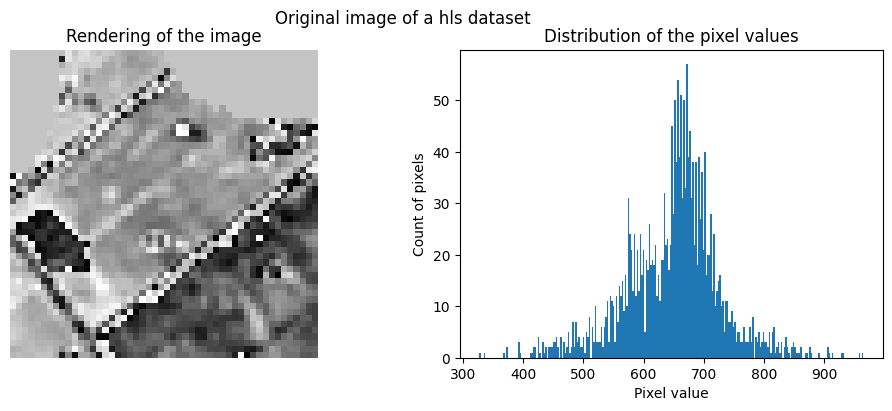

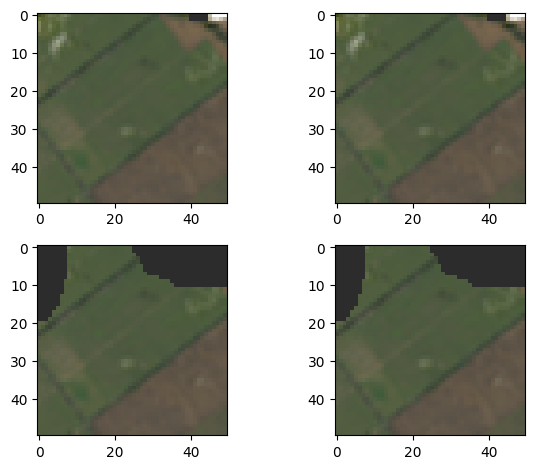

image: (1, 50, 50) [[[ nan  nan  nan ... 769. 762. 753.]
  [ nan  nan  nan ... 774. 778. 764.]
  [ nan  nan  nan ... 674. 760. 779.]
  ...
  [782. 784. 783. ... 639. 612. 603.]
  [756. 773. 792. ... 647. 628. 612.]
  [755. 781. 791. ... 655. 631. 643.]]]


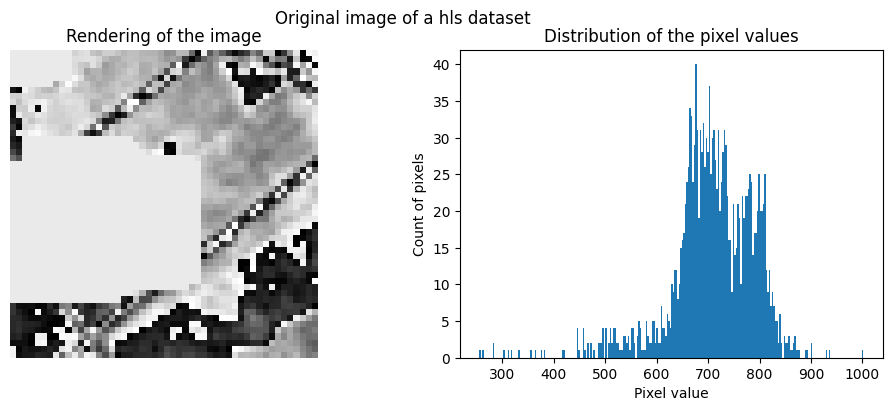

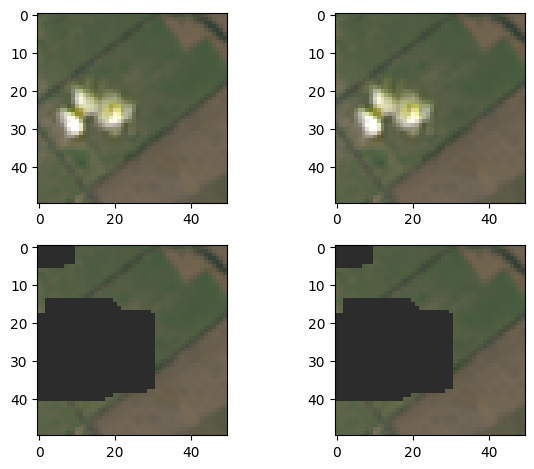

image: (1, 50, 50) [[[748. 767. 740. ... 641. 641. 635.]
  [740. 761. 771. ... 610. 638. 629.]
  [756. 744. 755. ... 551. 622. 644.]
  ...
  [726. 716. 707. ... 595. 593. 599.]
  [691. 704. 725. ... 602. 601. 600.]
  [693. 710. 729. ... 597. 596. 612.]]]


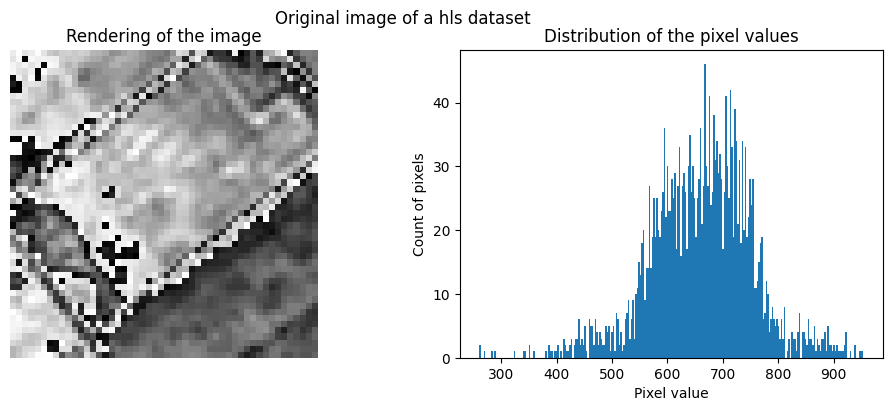

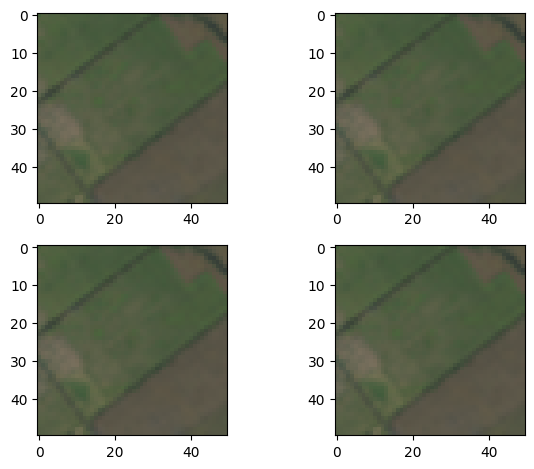

In [8]:
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

print(f'NumPy version:{np.__version__}')
np.float = float # 'float32' # float
table_dtype = int   # np.float  #'float32'
print(table_dtype)

# hls_data = HLSDataSet(table_dtype = table_dtype)
hls_data = HLSInference(table_dtype = table_dtype)

# hls_data._REFLECTANCE(round=3)
# hls_data._QUANTIZATE(round=3)

hls_data.clip_dataset(x1=50.0, y1=50.0, x2=100.0, y2=100.0)

doys = [171, 179, 187, 195, 203, 211, 219]
doys = [171, 179, 187, 203, 211, 219]
doys = [203, 211, 219]
df = hls_data._get_data_doys(doys = doys, SHOW=True)
display(df)

# df = hls_data._set_columns_name()
# display(df)

df1, df2 = hls_data._nan_9999()
# display(df1)
# display(df2)

df1, df2 = hls_data._set_clear_cloud()
# display(df1)
# display(df2)

data, nan, clear, cloud = hls_data._set_train_columns_name()

print('clear')
display(clear)

# train_data, test_data = hls_data._set_train_test_data(doy=211.0, x1=60.0, y1=40.0, x2=75.0, y2=55.0)

train_data, test_data = hls_data._set_train_test_data(doy=211.0, x1=45.0, y1=45.0, x2=50.0, y2=50.0, for_show_nan=False)
# train_data, test_data = hls_data._set_timeseries_train_test_data(doy=211.0, x1=50.0, y1=50.0, x2=100.0, y2=100.0)

print('train_data', train_data['DOY'].unique())
display(train_data)
print('test_data')
display(test_data)
# display(data)
# display(nan)
# display(clear)
# display(cloud)

to_impute = hls_data._to_impute()
hls_data._inference_train_test_data()
hls_data._inference_imshow()

# fn

In [9]:
def GetModel(train_data, experiment_dir = '', load_model_path = '', tokenizer='',):

    data = train_data.copy()
    # Get the DataFrame with columns in reverse order
    # data = data[data.columns[::-1]].copy()

    print(data.dtypes.tolist())
    # Reset the index to remove it
    data = data.reset_index(drop=True)
    display(data)

    # Get the current CPU time in seconds since the epoch
    current_time = int(time.time())
    # Use the current time as a seed for a random number generator
    random_seed_state = current_time  # You can use this random_state for various random processes

    step_checkpoint = 12000
    #### TRAINER HYPERPARAMETERS #############################
    save_steps = 1000
    logging_steps = 1
    
    epochs = 1
    batch_size = 1
    
    learning_rate = 1e-12
    lr_scheduler_type = 'constant'
    # lr_scheduler_type = 'cosine'
    num_cycles = 4
    
    warmup_steps = 5000
    
    optimizer = 'sophia'
    ##########################################################

    efficient_finetuning = '' #'lora'

    print('experiment_dir :', experiment_dir)
    print('load_model_path:', load_model_path)

    # # load_model_path = 'load_model/checkpoint-16000'
    # model = GReaT(llm=load_model_path,
    #               # tokenizer=load_model_path,
    #               tokenizer=tokenizer,
    #               batch_size=batch_size, epochs=epochs, max_steps=1,
    #               logging_steps=logging_steps, save_steps=save_steps,
    #               # evaluation_strategy='steps',
    #               # dataloader_num_workers=2, #fp16=True,
    #               logging_first_step=True,
    #               save_total_limit=2,
    #               prediction_loss_only=True,
    #               experiment_dir=experiment_dir,
    #               dataloader_num_workers=2,
    #               efficient_finetuning = efficient_finetuning,
    #               learning_rate=learning_rate,
    #               lr_scheduler_type=lr_scheduler_type,
    #               warmup_steps = warmup_steps,
    #               num_cycles = num_cycles,
    #               # warmup_ratio=0.05,
    #               seed=current_time,
    #               data_seed=current_time+int(time.time()),
    #               # optim=TRAINER_DICT['optimizer'],
    #               fp16 = True,
    #               # torch_compile=True,   #### uncomment for Ampere
    #               # bf16=True,            #### uncomment for Ampere
    #               report_to='none',
    #               )

    model = GReaT(llm=load_model_path,
                  # tokenizer=load_model_path,
                  tokenizer=tokenizer,
                  # tokenizer=load_model_path,
                  auto_find_batch_size=True,
                  batch_size=1, epochs=epochs, max_steps = 1,
                  logging_steps=logging_steps, save_steps=save_steps,
                  # evaluation_strategy='steps',
                  logging_first_step=True,
                  save_total_limit=2,
                  # prediction_loss_only=True,
                  experiment_dir=experiment_dir,
                  dataloader_num_workers=4,
                  efficient_finetuning = efficient_finetuning,
                  learning_rate=learning_rate,
                  lr_scheduler_type=lr_scheduler_type,
                  warmup_steps = warmup_steps,
                  num_cycles = num_cycles,
                  # warmup_ratio=0.05,
                  seed=current_time,
                  data_seed=current_time+int(time.time()),
                  # optim=TRAINER_DICT['optimizer'],
                  fp16 = True,            #### comment for Ampere, for Volta
                  # torch_compile=True,   #### uncomment for Ampere
                  # bf16=True,            #### uncomment for Ampere
                  report_to='none',
                  # run_name=f'{EXP_NAME}/run[{TRAINER_RUN}]',
                  # evaluation_strategy="steps",
                  # eval_steps=logging_steps,
                  label_names=["DOY", "PID", "B02", "B03", "B04"],    
                  )

    # model.load_from_dir(f'{load_model_path}')
    # print(f'----------- Model architecture, efficient_finetuning: {efficient_finetuning} -----------------------')
    # print(model.model)
    # print(f'----------------------------------------------------------------------------------------------------')
    
    model.fit(data=data[0:2], test_data=data[0:2], conditional_col='DOY', resume_from_checkpoint=True)
    # model.fit(data[0:1])

    return model

# fn
# model.fit(data=train_data, test_data=test_data)

# TRAINER_DICT.to_csv(f'{experiment_dir}.csv')

In [10]:
!pwd


# i_run = 0

EXP_NAME = f'A0[RGB_REFL[int]3BAND]'
EXP_NAME = f'A0[RGB_ORIG[int]3BAND]'

# EXP_NAME = f'A0[RGB_ORIG[int]3BAND]'

# #### LISTS for TRAINER_RUN cycles POLYNOMIAL WITH WARMUP ###################################
# epochs_list = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# max_steps_list =    [150000, 108000, 10000, 20000, 20000, 20000, 20000, 20000]
# warmup_steps_list = [15000,  5000,  5000,      0,     0,     0,     0,     0]

# lr_scheduler_type_list = ['constant', 'constant', 'constant', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial' ]     # 'polynomial'      
# num_cycles = 3

# learning_rate_list = [1e-27, 1e-26, 1e-4, 1e-4, 7e-5, 2e-5, 7e-6, 2e-6]
# ########################################################################
step_checkpoint_list = [250000, 175000, 175000, 175000, 175000]



load_model_path_list = []
experiment_dir_list  = []

for i_run, chkpt in enumerate(step_checkpoint_list):
    experiment_dir_list.append(f'{EXP_NAME}/run[{i_run}]')
    load_model_path_list.append(f'{EXP_NAME}/run[{i_run}]/checkpoint-{chkpt}')
    # load_model_path_list.append(f'run[{i_run}]/model')

i_run = 0

print(load_model_path_list)

print('i_run:', i_run, load_model_path_list[i_run])

train_columns_list = ['B02', 'B03', 'B04', 'PID', 'DOY']

# # Create a new column 'BAND' by concatenating 'B02', 'B03', and 'B04' with ';'
# train_data['BAND'] = train_data.apply(lambda row: ';'.join([str(row['B02']), str(row['B03']), str(row['B04'])]), axis=1)
# train_columns_list = ['PID', 'DOY', 'BAND']

#### CODE DATA 4 TRAIN #####################################
# train_columns_list = ['PID', 'DOY', 'BAND']
train_columns_list = ['B02', 'B03', 'B04', 'PID', 'DOY']
# train_columns_list = ['B02', 'B03', 'B04', 'X', 'Y', 'DOY']
# train_columns_list = ['B03', 'PID', 'DOY']
# data = train_data[train_columns_list].copy()

# train_data['B02'] = train_data['B02'] * 1000
# train_data['B03'] = train_data['B03'] * 1000
# train_data['B04'] = train_data['B04'] * 1000
# train_data = train_data.astype(int)
################################

# i_run = 0
model = GetModel(train_data[train_columns_list], 
                 experiment_dir = experiment_dir_list[i_run], 
                 load_model_path = load_model_path_list[i_run], 
                 # tokenizer=load_model_path_list[i_run],)
                 tokenizer=f"{EXP_NAME}/aispace-tokenizer")
# model = []

recovered_data = hls_data._impute(model=model, k=10000, max_length=60, temperature=1e-32) #, device='cpu')

imputed_file = f'{EXP_NAME}/recovered_output_run[{i_run}].csv'
hls_data._save_recovered(imputed_file=imputed_file)

imputed_file = f'{EXP_NAME}/imputed_output_run[{i_run}].csv'
hls_data._save_imputed(imputed_file=imputed_file)

/home
['A0[RGB_ORIG[int]3BAND]/run[0]/checkpoint-250000', 'A0[RGB_ORIG[int]3BAND]/run[1]/checkpoint-175000', 'A0[RGB_ORIG[int]3BAND]/run[2]/checkpoint-175000', 'A0[RGB_ORIG[int]3BAND]/run[3]/checkpoint-175000', 'A0[RGB_ORIG[int]3BAND]/run[4]/checkpoint-175000']
i_run: 0 A0[RGB_ORIG[int]3BAND]/run[0]/checkpoint-250000
[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


,B02,B03,B04,PID,DOY
0,563,958,800,5850,203
1,253,740,537,5950,203
2,237,706,501,6050,203
3,264,729,532,6150,203
4,268,735,528,6250,203
...,...,...,...,...,...
6275,338,591,576,9599,219
6276,350,606,577,9699,219
6277,345,597,566,9799,219
6278,348,596,573,9899,219


experiment_dir : A0[RGB_ORIG[int]3BAND]/run[0]
load_model_path: A0[RGB_ORIG[int]3BAND]/run[0]/checkpoint-250000


Optimiser: Sophia
self.train_hyperparameters: {'auto_find_batch_size': True, 'logging_steps': 1, 'save_steps': 1000, 'logging_first_step': True, 'save_total_limit': 2, 'dataloader_num_workers': 4, 'learning_rate': 1e-12, 'lr_scheduler_type': 'constant', 'warmup_steps': 5000, 'seed': 1701953499, 'data_seed': 3403906998, 'fp16': True, 'report_to': 'none', 'label_names': ['DOY', 'PID', 'B02', 'B03', 'B04']}
total_train_steps calculated: 1 2 1
warmup_steps: 5000
lr_scheduler_type: constant


Step,Training Loss


to impute data:


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,NaN,NaN,NaN,NaN,NaN,1550,975,211,5050
1,NaN,NaN,NaN,NaN,NaN,1551,975,211,5150
2,NaN,NaN,NaN,NaN,NaN,1552,975,211,5250
3,NaN,NaN,NaN,NaN,NaN,1553,975,211,5350
4,NaN,NaN,NaN,NaN,NaN,1554,975,211,5450
...,...,...,...,...,...,...,...,...,...
824,NaN,NaN,NaN,NaN,NaN,1563,1015,211,6390
825,NaN,NaN,NaN,NaN,NaN,1564,1015,211,6490
826,NaN,NaN,NaN,NaN,NaN,1565,1015,211,6590
827,NaN,NaN,NaN,NaN,NaN,1566,1015,211,6690


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,333,722,563,4134,0,1560,975,211,6050
1,341,731,571,4168,0,1561,975,211,6150
2,334,735,554,4358,0,1562,975,211,6250
3,308,707,503,4450,0,1563,975,211,6350
4,313,699,512,4221,0,1564,975,211,6450
...,...,...,...,...,...,...,...,...,...
1666,372,677,698,2116,0,1595,1024,211,9599
1667,372,696,702,2172,0,1596,1024,211,9699
1668,348,655,657,2141,0,1597,1024,211,9799
1669,339,631,633,2149,0,1598,1024,211,9899


NumPy version:1.26.1
IMPUTE:


,B02,B03,B04,PID,DOY
0,NaN,NaN,NaN,5050,211
1,NaN,NaN,NaN,5150,211
2,NaN,NaN,NaN,5250,211
3,NaN,NaN,NaN,5350,211
4,NaN,NaN,NaN,5450,211
...,...,...,...,...,...
824,NaN,NaN,NaN,6390,211
825,NaN,NaN,NaN,6490,211
826,NaN,NaN,NaN,6590,211
827,NaN,NaN,NaN,6690,211


100%|██████████| 829/829 [06:01<00:00,  2.29it/s]

IMPUTED:


,B02,B03,B04,PID,DOY
0,271.0,751.0,660.0,5050.0,211.0
1,312.0,700.0,511.0,5150.0,211.0
2,220.0,656.0,403.0,5250.0,211.0
3,34.0,717.0,41.0,5350.0,211.0
4,32.0,64.0,628.0,5450.0,211.0
...,...,...,...,...,...
824,290.0,69.0,555.0,6390.0,211.0
825,21.0,667.0,469.0,6490.0,211.0
826,394.0,719.0,499.0,6590.0,211.0
827,303.0,490.0,516.0,6690.0,211.0


Index(['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID'], dtype='object') Index(['B02', 'B03', 'B04', 'PID', 'DOY'], dtype='object')
(829, 9) (829, 5)
Index(['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID'], dtype='object') Index(['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID'], dtype='object')
(829, 9) (829, 9)
imputed_data


,PID,DOY,Y,X,NDVI,B05,B04,B03,B02
0,5050,211,975,1550,NaN,NaN,660.0,751.0,271.0
1,5150,211,975,1551,NaN,NaN,511.0,700.0,312.0
2,5250,211,975,1552,NaN,NaN,403.0,656.0,220.0
3,5350,211,975,1553,NaN,NaN,41.0,717.0,34.0
4,5450,211,975,1554,NaN,NaN,628.0,64.0,32.0
...,...,...,...,...,...,...,...,...,...
824,6390,211,1015,1563,NaN,NaN,555.0,69.0,290.0
825,6490,211,1015,1564,NaN,NaN,469.0,667.0,21.0
826,6590,211,1015,1565,NaN,NaN,499.0,719.0,394.0
827,6690,211,1015,1566,NaN,NaN,516.0,490.0,303.0


recovered_data


,PID,DOY,Y,X,NDVI,B05,B04,B03,B02
0,5050,211,975,1550,NaN,NaN,660.0,751.0,271.0
1,5150,211,975,1551,NaN,NaN,511.0,700.0,312.0
2,5250,211,975,1552,NaN,NaN,403.0,656.0,220.0
3,5350,211,975,1553,NaN,NaN,41.0,717.0,34.0
4,5450,211,975,1554,NaN,NaN,628.0,64.0,32.0
...,...,...,...,...,...,...,...,...,...
2495,9599,211,1024,1595,0.0,2116.0,698.0,677.0,372.0
2496,9699,211,1024,1596,0.0,2172.0,702.0,696.0,372.0
2497,9799,211,1024,1597,0.0,2141.0,657.0,655.0,348.0
2498,9899,211,1024,1598,0.0,2149.0,633.0,631.0,339.0


A0[RGB_ORIG[int]3BAND]/recovered_output_run[0].csv
A0[RGB_ORIG[int]3BAND]/imputed_output_run[0].csv


A0[RGB_ORIG[int]3BAND]/recovered_output_run[0].csv
recovered_data


,PID,DOY,Y,X,NDVI,B05,B04,B03,B02
0,5050,211,975,1550,NaN,NaN,660.0,751.0,271.0
1,5150,211,975,1551,NaN,NaN,511.0,700.0,312.0
2,5250,211,975,1552,NaN,NaN,403.0,656.0,220.0
3,5350,211,975,1553,NaN,NaN,41.0,717.0,34.0
4,5450,211,975,1554,NaN,NaN,628.0,64.0,32.0
...,...,...,...,...,...,...,...,...,...
2495,9599,211,1024,1595,0.0,2116.0,698.0,677.0,372.0
2496,9699,211,1024,1596,0.0,2172.0,702.0,696.0,372.0
2497,9799,211,1024,1597,0.0,2141.0,657.0,655.0,348.0
2498,9899,211,1024,1598,0.0,2149.0,633.0,631.0,339.0


image: (1, 50, 50) [[[ 751.  700.  656. ...  769.  762.  753.]
  [ 671.  637. 6216. ...  774.  778.  764.]
  [  70.  685.  624. ...  674.  760.  779.]
  ...
  [ 782.  784.  783. ...  639.  612.  603.]
  [ 756.  773.  792. ...  647.  628.  612.]
  [ 755.  781.  791. ...  655.  631.  643.]]]


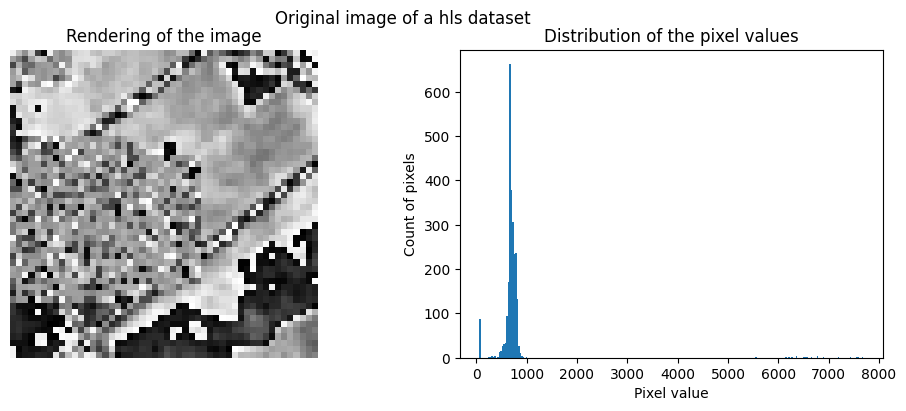

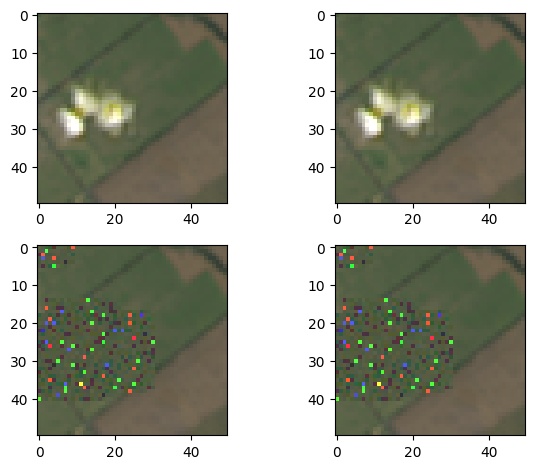

A0[RGB_ORIG[int]3BAND]/recovered_output_run[0].csv
image: (1, 50, 50) [[[ 751.  700.  656. ...  769.  762.  753.]
  [ 671.  637. 6216. ...  774.  778.  764.]
  [  70.  685.  624. ...  674.  760.  779.]
  ...
  [ 782.  784.  783. ...  639.  612.  603.]
  [ 756.  773.  792. ...  647.  628.  612.]
  [ 755.  781.  791. ...  655.  631.  643.]]]


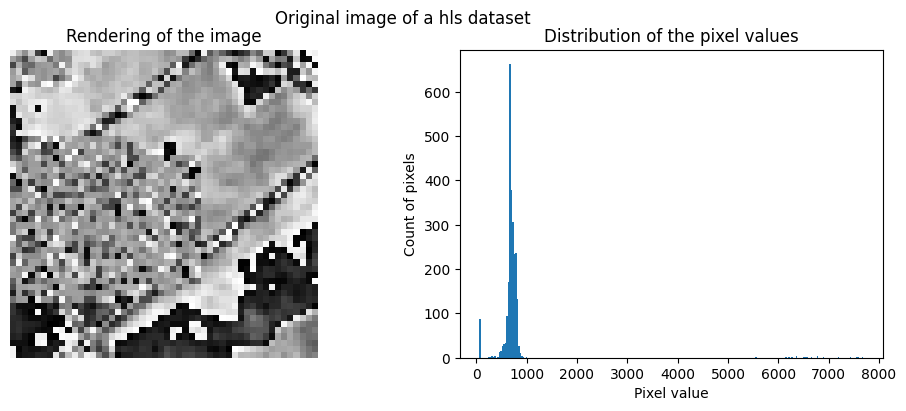

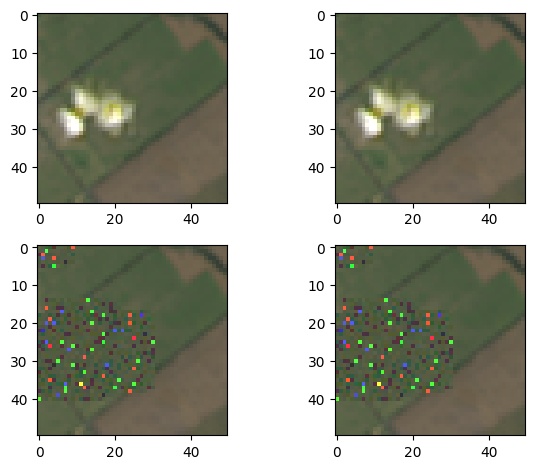

A0[RGB_ORIG[int]3BAND]/recovered_output_run[1].csv
image: (1, 50, 50) [[[766. 767. 747. ... 769. 762. 753.]
  [740. 761. 740. ... 774. 778. 764.]
  [756. 744. 755. ... 674. 760. 779.]
  ...
  [782. 784. 783. ... 639. 612. 603.]
  [756. 773. 792. ... 647. 628. 612.]
  [755. 781. 791. ... 655. 631. 643.]]]


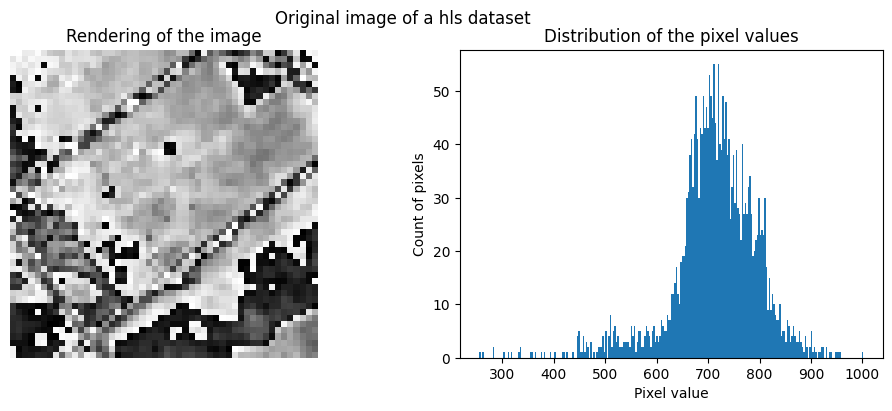

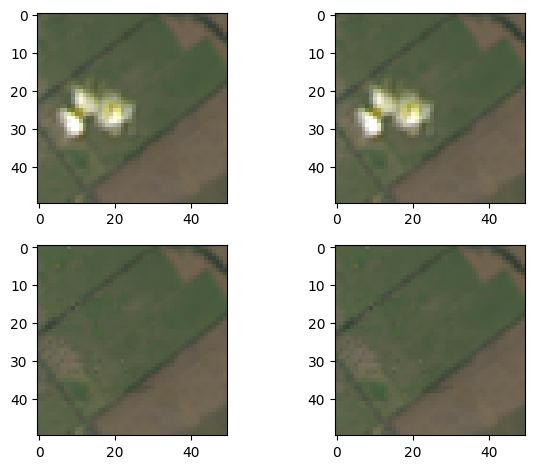

A0[RGB_ORIG[int]3BAND]/recovered_output_run[2].csv


FileNotFoundError: [Errno 2] No such file or directory: 'A0[RGB_ORIG[int]3BAND]/recovered_output_run[2].csv'

In [11]:

i_run=0

# imputed_file = f'{experiment_dir}/imputed_output_run[{i_run}].csv'
# imputed_data = hls_data._read_imputed(imputed_file)

imputed_file = f'{EXP_NAME}/recovered_output_run[{i_run}].csv'
recovered_data = hls_data._read_recovered(imputed_file)

# display(imputed_data)
print('recovered_data')
display(recovered_data)

hls_data._set_inference_recovered()
hls_data._inference_imshow()

# fn
# experiment_dir = 'A0[shuf_sophia]'
# experiment_dir = 'A0[great_sophia]'
imputed_file = f'{EXP_NAME}/recovered_output_run[{i_run}].csv'
for i_run in range(0,4):
  imputed_file = f'{EXP_NAME}/recovered_output_run[{i_run}].csv'
  recovered_data = hls_data._read_recovered(imputed_file)

  hls_data._set_inference_recovered()
  hls_data._inference_imshow()
# display(recovered_data)
# recovered_data = pd.read_csv(imputed_file)

# display(recovered_data)

In [ ]:
# hls_data._imputed_data(recovered_data)

hls_data._set_inference_recovered()

# hls_data._inference_train_test_data()
hls_data._inference_imshow()

In [ ]:
fn

In [ ]:
# #### TEST METRICS ##################
# nan_data = test_data.copy()
# nan_data = nan_data.reset_index(drop=True)

# print(nan_data.dtypes.tolist())

# display(nan_data)
# print(nan_data.columns)
# # fn

# print(f'NumPy version:{np.__version__}')
# np.float = float

# imputed_data = model.impute(nan_data, k=256, max_length=50000, temperature=0.01) #, device='cpu')
# imputed_data.to_csv('test_imputed_output.csv')

# # imputed_data = pd.read_csv('imputed_output.csv')
# # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
# # imputed_data = imputed_data.loc[:, ~imputed_data.columns.str.contains('^Unnamed')]

In [ ]:
fn

In [ ]:
data = clear.copy() #[0:1000]

table_dtype = 'int16'

data = data.astype(table_dtype)
print(data.dtypes.tolist())
# Reset the index to remove it
data = data.reset_index(drop=True)
# train_data.columns = final_columns_list
# display(data)


# Split the DataFrame into training and test DataFrames
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data = train_data.reset_index(drop=True)
display(train_data)
test_data = test_data.reset_index(drop=True)
display(test_data)

# #### FOR CPU USABILITY, for 2 pixels #################################
# epochs_steps = 1  # 250 #50
# save_steps = 1   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 1 # 250 #25 #9380  #1000

#### FOR T-4 GPU USABILITY################################
epochs_steps = 200   # 250 #50
save_steps = 100   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
logging_steps = 50 # 250 #25 #9380  #1000
#### batch_size = 250 for T4
batch_size = 200 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
#######################################

# #### FOR V-100 GPU USABILITY################################
# epochs_steps = 200   # 250 #50
# save_steps = 1000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 200 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 232 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################

# #### FOR A-100 GPU USABILITY################################
# epochs_steps = 800   # 250 #50
# save_steps = 10000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 500 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 800 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################

EXP_NAME = 'exp-A100'
EXP_NAME = 'exp-V100'
EXP_NAME = 'exp-T4'

EXP_NAME = 'A0BASE'

#### 1 ###########
# learning_rate = 5e-5
# lr_scheduler_type = 'constant' # constant_with_warmup

step_checkpoint = 16000
######### SET TRAINER_RUN ARGUMENTS ##########################
learning_rate = 0.00001
lr_scheduler_type = 'cosine_with_restarts'
lr_scheduler_type = 'constant_with_warmup'
lr_scheduler_type = 'cosine'
lr_scheduler_type = 'linear'

TRAINER_RUN = 0
if TRAINER_RUN == 0:
  load_model_path = 'distilgpt2'
  experiment_dir = f"{EXP_NAME}/run[{TRAINER_RUN}]"
elif TRAINER_RUN > 0:
  before = pd.read_csv(f'{EXP_NAME}/run[{TRAINER_RUN-1}].csv')
  load_model_path = before['experiment_dir'][0] + f'/checkpoint-{step_checkpoint}'
  experiment_dir  = f"{EXP_NAME}/run[{TRAINER_RUN}]"

TRAINER_DICT = pd.DataFrame({'EXP_NAME' : EXP_NAME}, index = [TRAINER_RUN])    # dict()


TRAINER_DICT['TRAINER_RUN'] = TRAINER_RUN
TRAINER_DICT['table_dtype'] = table_dtype
TRAINER_DICT['epochs_steps'] = epochs_steps
TRAINER_DICT['save_steps'] = save_steps
TRAINER_DICT['logging_steps'] = logging_steps
TRAINER_DICT['batch_size'] = batch_size
TRAINER_DICT['learning_rate'] = learning_rate
TRAINER_DICT['lr_scheduler_type'] = lr_scheduler_type
TRAINER_DICT['experiment_dir'] = experiment_dir

display(pd.DataFrame.from_dict(TRAINER_DICT))

##### SET experiment_dir & efficient_finetuning #######################
efficient_finetuning = ''  #'lora'
if efficient_finetuning == 'lora':
    experiment_dir = f"{experiment_dir}_{efficient_finetuning}"
##### SET experiment_dir & efficient_finetuning #######################
optimizer = 'adamw_torch'
# optimizer = 'adamw_torch_fused'  #'adamw_torch'  #'adamw_torch_fused'
if optimizer == 'adamw_torch_fused':
    experiment_dir = f"{experiment_dir}_{optimizer}"
#### SET model_save_dir through save_model #########################
# model_save_dir = f'{EXP_NAME}/ZeroModel_{efficient_finetuning}'


print('experiment_dir :', experiment_dir)
print('load_model_path:', load_model_path)


model = GReaT(llm=load_model_path,
              batch_size=batch_size, epochs=epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
              # evaluation_strategy='steps',
              # dataloader_num_workers=2, #fp16=True,
              save_total_limit=2,
              prediction_loss_only=True,
              experiment_dir=f'{experiment_dir}',
              dataloader_num_workers=2,
              efficient_finetuning = efficient_finetuning,
              learning_rate=learning_rate,
              lr_scheduler_type=lr_scheduler_type,
              warmup_ratio=0.1,
              # optim=optimizer,
              fp16 = True,
              # torch_compile=True,   #### for Ampere
              # bf16=True,            #### for Ampere
              )

print(f'----------- Model architecture, efficient_finetuning: {efficient_finetuning} -----------------------')
print(model.model)
print(f'----------------------------------------------------------------------------------------------------')
# fn

model.fit(data=train_data)
# model.fit(data=train_data, test_data=test_data)

TRAINER_DICT.to_csv(f'{experiment_dir}.csv')



In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
fn

In [ ]:
fn